### Gaussian Distribution

Bell shaped curve -  Probability Density Function of gaussian distributed random variable
- x is a continious random variable, x has a PDF similar to bell shape curve -> x is normally distributed.

Properties:-
- The more the variance, the more wide is the curve.
- The less the variance, the more peaker the curve summit.
- Most of the times, the peak is at the mean.
- Symmetric shape
- Follows 68-95-99.7 rule
- As x moves away from the mean, y decreases at the rate of y=exp(-x**2)

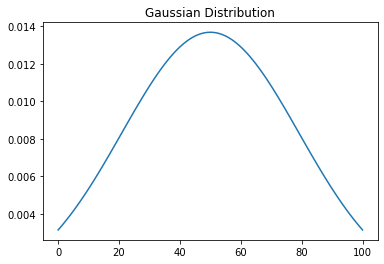

In [1]:
# Implementation - Example

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,101)

# calculating pdf of our x values
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))

plt.plot(x,pdf(x))
plt.title("Gaussian Distribution")
plt.show()

#### Cumulative Distribution Function of Normal Distribution

- S shaped curve.
- Displays the probabilty that random variable x is less than equals to x'.
- Ranges between 0-1.
- Symmetric - therefore 50% will be at 0 (if mean is 0).
- The less the variance, the more closer CDF line to the mean.

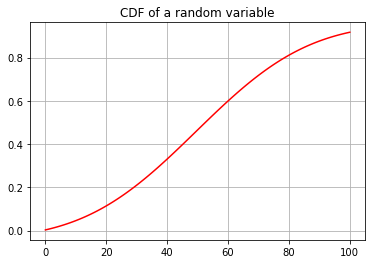

In [2]:
# Implementation

import numpy as np
import pylab

x = np.arange(0,101)

# PDF code
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))

# Finding CDF
cdf = np.cumsum(pdf(x))

plt.plot(x,cdf,color='r')
plt.title("CDF of a random variable")
plt.grid()
plt.show()

### Standard Normal Variate - (z)

- z in normally distributed random variable with mean 0 and variance 1 - z~N(0,1).

Given a bunch of normal random values with mean and variance, we can Standardize these values.
Standardization Formula: 
- for every Xi' = Xi - mean / std deviation.
- therefore if Xi's are normally ditributed, then Xi~N(0,1).
- Why to do it? We know that between -1 and 1, there lies our 68% data (68-95-99.7 rule).

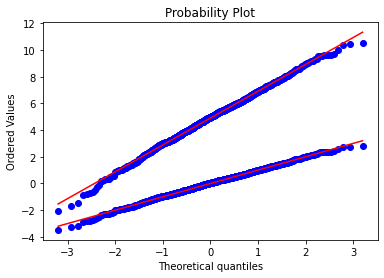

In [3]:
# Implementation

import scipy.stats as stats

# create rv X and plot it
x_dist = np.random.normal(loc=5,scale=2,size=1001) # normal dist

# standardizing the x_values
std_x = []
mean = np.mean(x_dist)
std_dev = np.std(x_dist)
for i in x_dist:
    val = (i - mean)/std_dev
    std_x.append(val)
    
# using QQ plot to verfiy
stats.probplot(x_dist,dist='norm',plot=pylab)
stats.probplot(std_x,dist='norm',plot=pylab)
pylab.show()

### Sampling mean of Sampling Distribution

For example:
1. A random variable x has ANY distribution with mean and variance. (Distribution of population).
2. From this population, we make m number of samples of size n where n = 30 (convention to use n >= 30).
3. We get Sm samples of size n each. We get m*n random variables from our population.
4. We then take mean for each of the sample, we get m number of means. x1', x2' .... xm'.
5. These mean values also have some distribution. The distribution of sample means is Normal, such that:
   ~N( population_mean, population_std / n ) -> as n tends to infinity.
6. Central Limit Theorem says if our original population distribution X has finite mean and variance, start sampling from X of size n (as stated in above points). Then point 5.
7. Population mean =~ Mean of xi's.
8. Population variance =~ Variance of xi's.

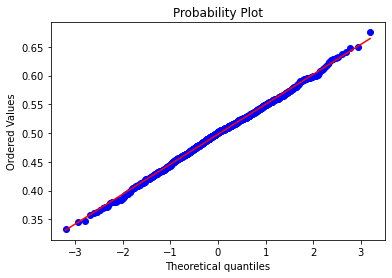

In [4]:
# implementation 

rand_dist = np.random.uniform(size=30000)  # using uniform distribution
pop_mean = np.mean(rand_dist)
pop_std = np.std(rand_dist)

# making m samples , m = 1000
samples = []
for i in range(1001):
    sample = np.random.choice(rand_dist,size=30)
    samples.append(sample)
    

# mean of each sample
mean_samples = []
for i in range(len(samples)):
    mean = np.mean(samples[i])
    mean_samples.append(mean)
    

# central limit theorem ~N(pop_mean, pop_std/n)
stats.probplot(mean_samples,dist='norm',plot=pylab)
pylab.show()

### Quantile - Quantile Plot

IS RV X NORMALLY DISTRIBUTED OR WHAT'S THE DISTRIBUTION OF X?

1. Let a random variable X with 500 observations. X1,X2.....X500.
2. Sort the Xi's and compute percentiles of them (1-100 percentiles).
3. Create a normally distributed random variable Y~N(0,1). Sort them and compute percentiles.
4. Plot Xi's percentiles on x-axis and random variable y on y axis.
5. If they fall on a same line, the random variable X has same distribution.

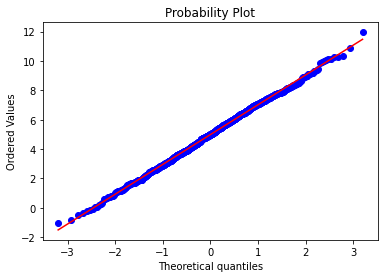

In [5]:
# Implementation of QQ plot

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pylab

# creating RV Y~N(0,1)
y_normal = np.random.normal(loc=0.0, scale=1, size=1000)

# computing percentiles of y
percentiles_y = []
for i in range(101):
    p = np.percentile(y_normal,i)
    percentiles_y.append(p)

    
# creating rv X to test
x_dist = np.random.normal(loc=5,scale=2,size=1000) # normal dist
percentiles_x = []
for i in range(101):
    p = np.percentile(x_dist,i)
    percentiles_x.append(p)
    
stats.probplot(x_dist,dist='norm',plot=pylab) # one method using pylab - it can also be done using pltb
pylab.show()

The points lies on a straight lines on our normal distributions, means our rv X is Normally distributed.

Let's see what happens in X is not Gaussian.

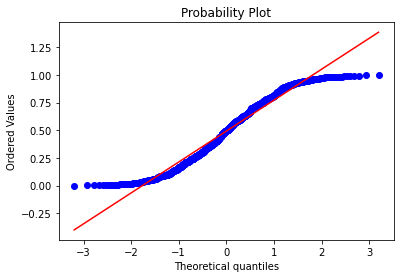

In [6]:
# creating rv X to test
x_dist = np.random.uniform(size=1000) # uniform dist
percentiles_x = []
for i in range(101):
    p = np.percentile(x_dist,i)
    percentiles_x.append(p)
    
stats.probplot(x_dist,dist='norm',plot=pylab) # one method using pylab - it can also be done using pltb
pylab.show()

A lot of deviation from the straight line, therefore, its not normal.

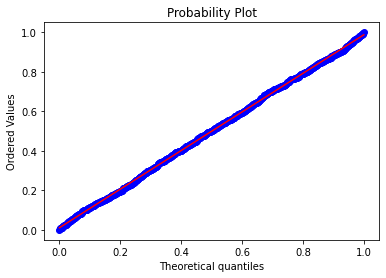

In [7]:
# creating rv X to test
x_dist = np.random.uniform(size=1000) # uniform dist
percentiles_x = []
for i in range(101):
    p = np.percentile(x_dist,i)
    percentiles_x.append(p)
    
stats.probplot(x_dist,dist='uniform',plot=pylab) # one method using pylab - it can also be done using pltb
pylab.show()

Points on the straight line, means that the rv X is uniformly distributed.